In [43]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import os

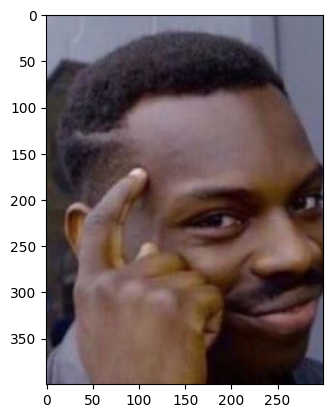

In [44]:
img = torchvision.io.read_image("task4.jpg")
img = img.permute(1,2,0).float() / 255.0
img = img[0:400, 100:400]
H,W,C = img.shape
plt.imshow(img)

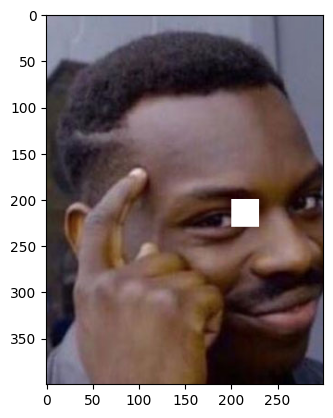

In [45]:
mask1 = torch.ones((H, W),dtype=torch.bool)
mask1[200:230, 200:230] = 0

masked_img1 = img.clone()
masked_img1[~mask1] = 1
plt.imshow(masked_img1)

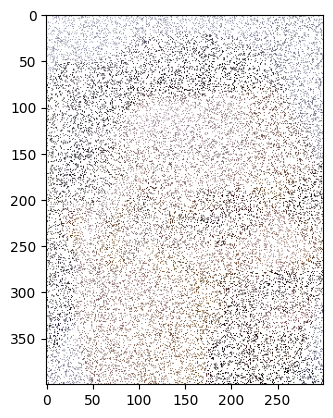

In [46]:
num_pixels = 100000
total_pixels = H * W
idx = torch.randperm(total_pixels)[:num_pixels]

mask2 = torch.ones((H, W),dtype=torch.bool)
mask2.view(-1)[idx] = False

masked_img2 = img.clone()
masked_img2[~mask2] = 1
plt.imshow(masked_img2)

In [47]:
def lowRankDescent(img, mask, rank=30, lr=0.01, epochs=5000):
    H, W, C = img.shape
    img_t = img.clone()
    mask_t = mask.clone()

    U = torch.rand(H, rank, C, requires_grad=True)
    V = torch.rand(W, rank, C, requires_grad=True)

    optimizer = torch.optim.Adam([U, V],lr=lr)

    for epoch in range(epochs):
        optimizer.zero_grad()

        recon = torch.ones((H,W,C))
        for c in range(C):
            recon[:,:,c] = U[:,:,c] @ V[:,:,c].T

        loss = torch.mean(((recon - img_t)[mask_t]) ** 2)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss = {loss.item():.6f}")
    
    return recon.detach()

Epoch 0, Loss = 53.452332
Epoch 100, Loss = 0.283474
Epoch 200, Loss = 0.122800
Epoch 300, Loss = 0.073968
Epoch 400, Loss = 0.049493
Epoch 500, Loss = 0.035573
Epoch 600, Loss = 0.027004
Epoch 700, Loss = 0.021378
Epoch 800, Loss = 0.017472
Epoch 900, Loss = 0.014619
Epoch 1000, Loss = 0.012439
Epoch 1100, Loss = 0.010705
Epoch 1200, Loss = 0.009284
Epoch 1300, Loss = 0.008092
Epoch 1400, Loss = 0.007079
Epoch 1500, Loss = 0.006212
Epoch 1600, Loss = 0.005467
Epoch 1700, Loss = 0.004827
Epoch 1800, Loss = 0.004276
Epoch 1900, Loss = 0.003802


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7002085..1.4833711].


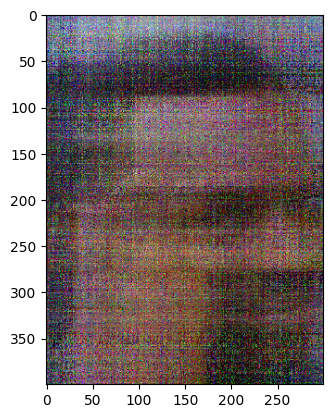

In [48]:
recon = lowRankDescent(img, mask2, rank=30, lr=1e-2, epochs=2000)

# Visualization (replace missing pixels with reconstruction)
final_img2 = img.clone()
final_img2[~mask2] = recon[~mask2]
plt.imshow(final_img2)